In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import rotate
#for standardizing data matrix
from sklearn.preprocessing import scale
#for PCA
from sklearn.decomposition import PCA as sklearnPCA
#for randomly splitting data into training and test sets
from sklearn.model_selection import train_test_split
#linear regression package
from sklearn import linear_model 
#for hyperspectral decomposition
from sklearn.decomposition import FastICA, NMF
#for calculating p value
from scipy.stats import f
hyper_list=np.load('./../../Jessica/Desktop/hyper_perovskite.npy')
exp_wavenumber=np.loadtxt('./data/wavenumber_ref.txt', skiprows=1)

First perform a 2 compnent NMF and look at the components. 

In [109]:
NMF_model=NMF(n_components=2, init='random', random_state=0, max_iter=1000)
NMF_fit=NMF_model.fit_transform(hyper_list[:,1:549])
NMF_comp=NMF_model.components_

Text(0,0.5,'Intensity (a.u.)')

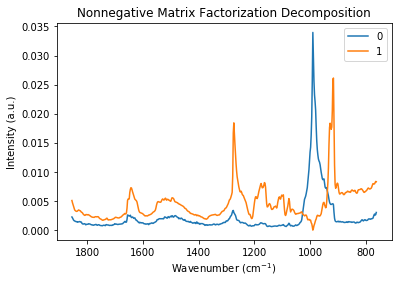

In [110]:
%matplotlib inline
for i in range(NMF_comp.shape[0]):
    plt.plot(exp_wavenumber[1:549], NMF_comp[i,:], label = i) 
plt.legend()
plt.gca().invert_xaxis()
plt.title('Nonnegative Matrix Factorization Decomposition')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (a.u.)')

In [111]:
# Jessica's plotting function
def show(img, cmap = 'plasma', colorbar = True):
    """Displays image with colorbar."""
    fig = plt.imshow(img, cmap = cmap)
    imgstd = img.std()
    imgmean = img.mean()
    ll = imgmean - (2*imgstd)
    ul = imgmean + (2*imgstd)
    plt.clim(ll,ul)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    if colorbar == True:
        plt.colorbar()
    return 

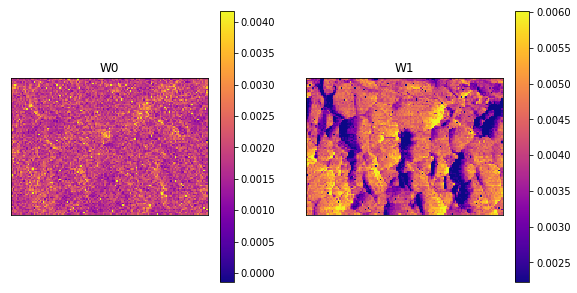

In [112]:
to_plot=NMF_fit.reshape((91,131,2))

plt.figure(figsize=(15,5))
plt.subplot(131), show(to_plot[:,:,0]), plt.title('W0')
plt.subplot(132), show(to_plot[:,:,1]), plt.title('W1')
#plt.subplot(133), show(to_plot[:,:,2]), plt.title('W2')
plt.show()


# Random Forest Regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score, make_scorer
mse_scorer = make_scorer('mean_squared_error')
from sklearn.preprocessing import StandardScaler

We want to predict the electrical current for a pixel using its spectra. The first step is to scale the electrical current, as it's on a pico (really really small) scale. So we use scikit's automatic function that standardizes by the standard deviation and centers on the mean. 

Jess: for perovskite data set, the cAFM image is scaled. 

In [114]:
y=np.load("./data/mixedperovskite/cAFMon.npy").reshape((11921))

In [139]:
#load the current and reshape to vector

#X = hyper_list[:,1:]
X = NMF_fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#make 5 folds
#kf = KFold(n_splits=5)
#kf.get_n_splits(X)
# build One model first

regr_rf = RandomForestRegressor(n_estimators=500)
regr_rf.fit(X_train, y_train)


#from sklearn import metrics
#cross_val_score(regr, X, y, cv=5, scoring=mse_scorer)

#for train_index, test_index in kf.split(X):
#    mod = regr.fit(X[, y)
#    print(mod.score())
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [140]:
y=np.load("./data/mixedperovskite/cAFMon.npy").reshape((11921))
pred = regr_rf.predict(X)
sd = np.std(y)
m = np.mean(y)
unscaled_y = y
unscaled_pred = pred
error = unscaled_y - unscaled_pred

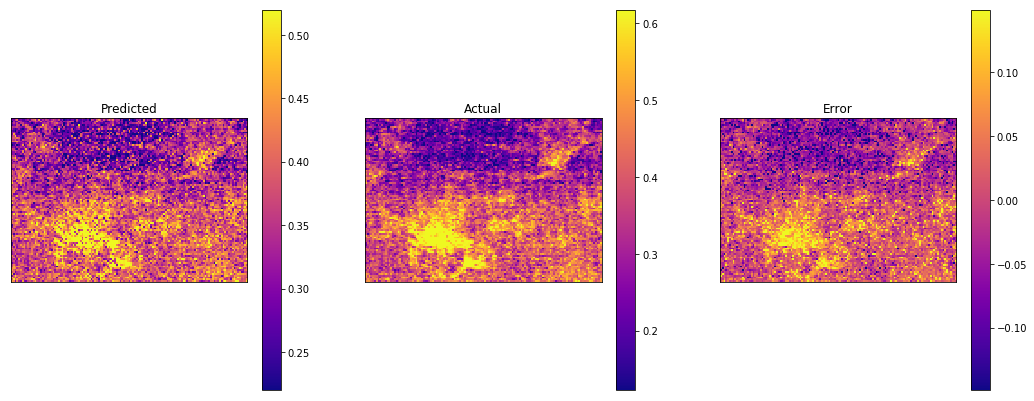

In [141]:
to_plot=unscaled_pred.reshape((91,131))
plt.figure(figsize=(18,7))
plt.subplot(131), show(to_plot), plt.title('Predicted')
plt.subplot(132), show(unscaled_y.reshape((91,131))), plt.title('Actual')
plt.subplot(133), show(error.reshape((91,131))), plt.title('Error')
plt.show()

## Random Forest Regressor

In [150]:
#load the current and reshape to vector
#X = hyper_list[:,1:]
X = hyper_list[:,1:]
y=np.load("./data/mixedperovskite/SKPMon.npy").reshape((11921))
y=scale(y,axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#make 5 folds
#kf = KFold(n_splits=5)
#kf.get_n_splits(X)
# build One model first

regr_rf = RandomForestRegressor(n_estimators=500)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [151]:
y=np.load("./data/mixedperovskite/SKPMon.npy").reshape((11921))
pred = regr_rf.predict(X)
sd = np.std(y)
m = np.mean(y)
unscaled_y = y
unscaled_pred = pred #*sd + m
error = unscaled_y - unscaled_pred

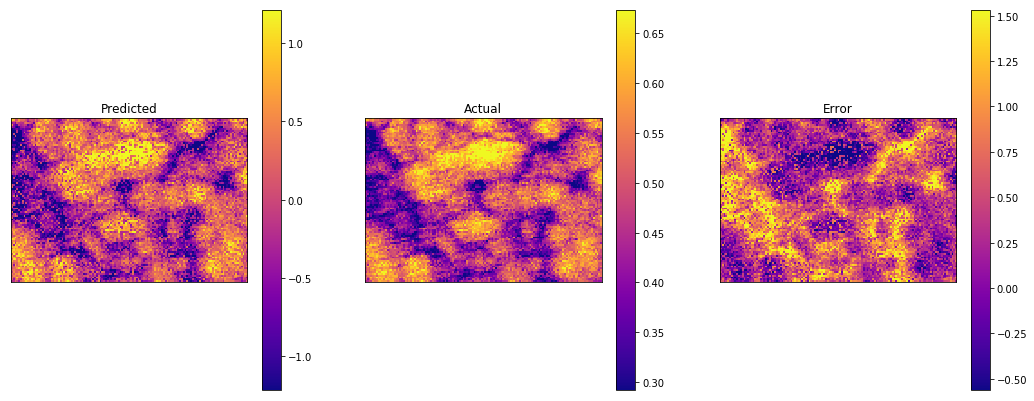

<Figure size 432x288 with 0 Axes>

In [153]:
to_plot=unscaled_pred.reshape((91,131))
plt.figure(figsize=(18,7))
plt.subplot(131), show(to_plot), plt.title('Predicted')
plt.subplot(132), show(unscaled_y.reshape((91,131))), plt.title('Actual')
plt.subplot(133), show(error.reshape((91,131))), plt.title('Error')
plt.show()
plt.savefig('rf_hyper.png')

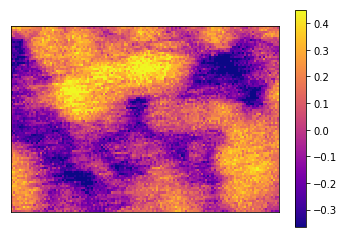

In [147]:
p=np.load("./data/mixedperovskite/SKPMon.npy")
po=np.load("./data/mixedperovskite/SKPMoff.npy")
show(p-po)

# SVR

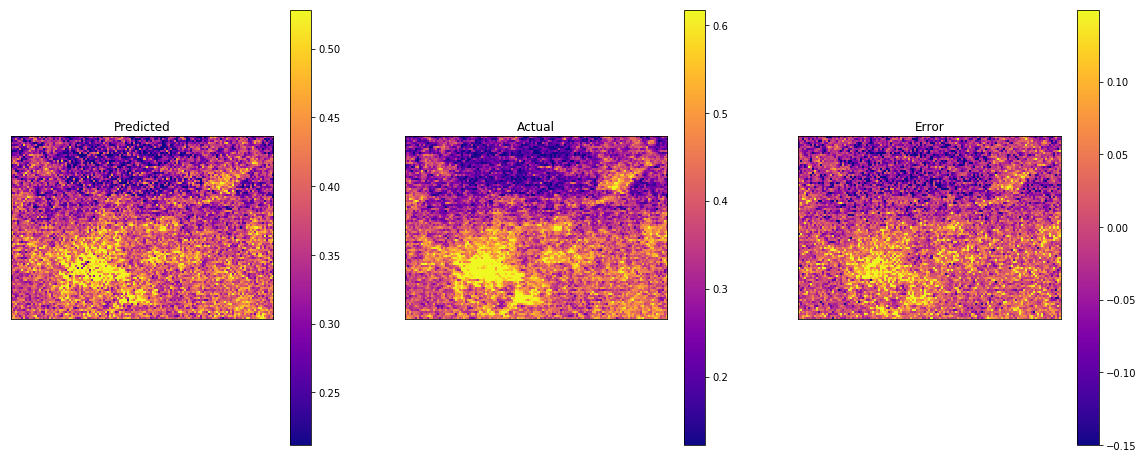

In [34]:
to_plot=unscaled_pred.reshape((91,131))
plt.figure(figsize=(20,8))
plt.subplot(131), show(to_plot), plt.title('Predicted')
#plt.clim(0,16e-12)
plt.subplot(132), show(unscaled_y.reshape((91,131))), plt.title('Actual')
#plt.clim(0,16e-12)
plt.subplot(133), show(error.reshape((91,131))), plt.title('Error')
#plt.clim(0,4e-12)
plt.show()

In [39]:
from sklearn.svm import SVR
from sklearn.svm.classes import NuSVR
X = hyper_list[:,1:]
y=np.load("./data/mixedperovskite/cAFMon.npy").reshape((11921))
#y=scale(y,axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#make 5 folds
#kf = KFold(n_splits=5)
#kf.get_n_splits(X)
# build One model first

regr_sv = NuSVR(C = 3, nu = 0.2)
regr_sv.fit(X_train, y_train) 

NuSVR(C=3, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.2, shrinking=True, tol=0.001, verbose=False)

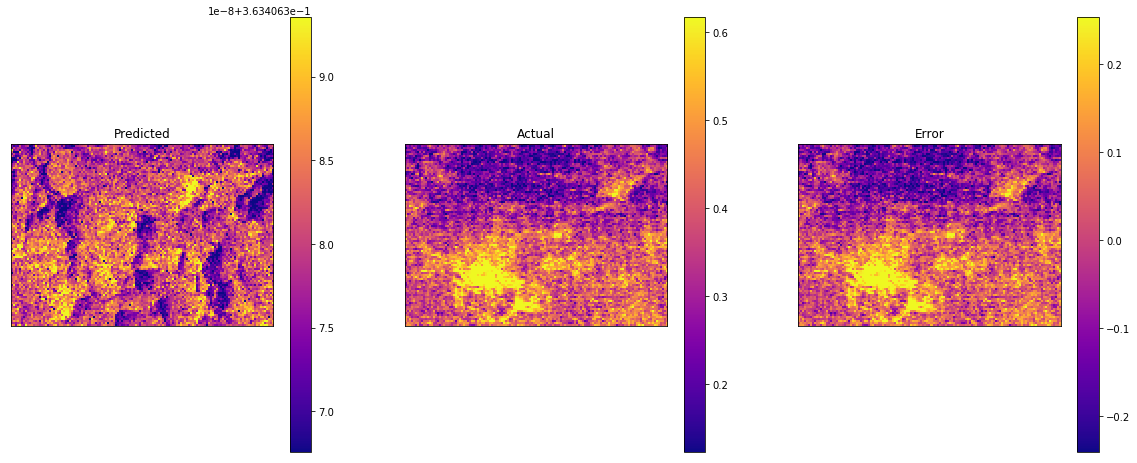

In [41]:
y=np.load("./data/mixedperovskite/cAFMon.npy").reshape((11921))
pred = regr_sv.predict(X)
sd = np.std(y)
m = np.mean(y)
unscaled_y = y
unscaled_pred = pred #*sd + m
error = unscaled_y - unscaled_pred

to_plot=unscaled_pred.reshape((91,131))
plt.figure(figsize=(20,8))
plt.subplot(131), show(to_plot), plt.title('Predicted')
#plt.clim(0,16e-12)
plt.subplot(132), show(unscaled_y.reshape((91,131))), plt.title('Actual')
#plt.clim(0,16e-12)
plt.subplot(133), show(error.reshape((91,131))), plt.title('Error')
#plt.clim(0,4e-12)
plt.show()

In [106]:
#chemical
FA=np.load("./data/mixedperovskite/FA.npy").reshape((11921,1))
MA=np.load("./data/mixedperovskite/MA.npy").reshape((11921,1))
#electrical
cAFMon=np.load("./data/mixedperovskite/cAFMon.npy").reshape((11921,1))
cAFMoff=np.load("./data/mixedperovskite/cAFMoff.npy").reshape((11921,1))
SKPMoff=np.load("./data/mixedperovskite/SKPMoff.npy").reshape((11921,1))
SKPMon=np.load("./data/mixedperovskite/SKPMon.npy").reshape((11921,1))
photovoltage=SKPMon-SKPMoff
photocurrent=cAFMon-cAFMoff

### LASSO

In [107]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
lasso = linear_model.Lasso(alpha=0.6, random_state=0)
photovoltage = scale(photovoltage)
photocurrent = scale(photocurrent)
MA = scale(MA)
FA = scale(FA)
x = np.hstack((photovoltage, MA, FA))
y = photocurrent

#make 5 folds
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True)
results = []
for train, test in k_fold.split(x):
    model_fit = lasso.fit(x[train], y[train])
    pred = model_fit.predict(x[test])
    results.append(r2_score(y[test], pred))

In [108]:
results

[-1.5588312289427364e-05,
 -0.0002594729770017956,
 -0.000887751018753935,
 -0.00010853646610664569,
 -0.00041257131307093076]

### Random Forest Regression w MA, FA, photovoltage

In [154]:
#load the current and reshape to vector
#X = hyper_list[:,1:]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regr_rf = RandomForestRegressor(n_estimators=500)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [155]:
pred = regr_rf.predict(x)
sd = np.std(y)
m = np.mean(y)
unscaled_y = y
unscaled_pred = pred #*sd + m
error = unscaled_y - unscaled_pred

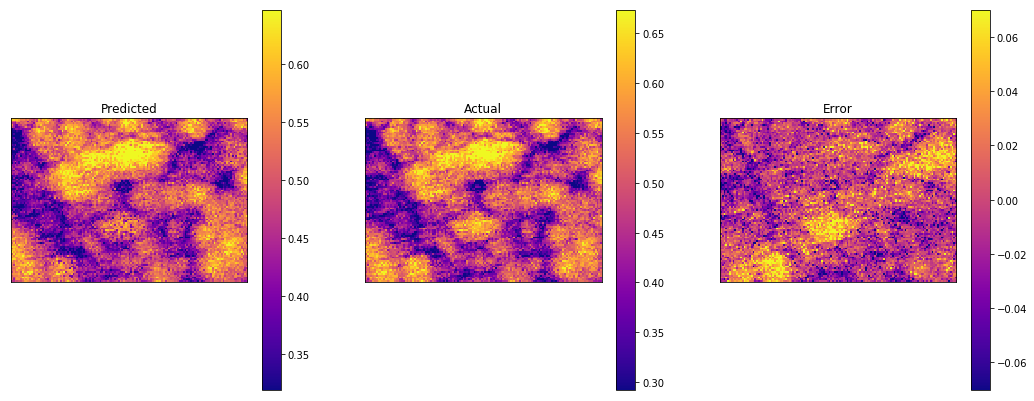

In [156]:
to_plot=unscaled_pred.reshape((91,131))
plt.figure(figsize=(18,7))
plt.subplot(131), show(to_plot), plt.title('Predicted')
plt.subplot(132), show(unscaled_y.reshape((91,131))), plt.title('Actual')
plt.subplot(133), show(error.reshape((91,131))), plt.title('Error')
plt.show()